<a href="https://colab.research.google.com/github/PrashantShrivastava1612/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries for analysis
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind

#importing libraries for preprocessing and ML Implementation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/Capstone Project/Bike Sharing Demand Prediction/SeoulBikeData.csv'
data = pd. read_csv(path, encoding = "ISO-8859-1")

In [4]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

In [7]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#null values in dataset
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
#duplicate values count
data.duplicated().sum()

0

Our dataset contains 8760 rows and 14 columns.

No null value is present in the datset.

No duplicate observations were present in the dataset.

## ***Understanding Variables***

In [10]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

###***Variable Description***



Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [11]:
# Dataset Describe
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## ***Data Wrangling***

In [12]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [13]:
data['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [15]:
def functioning(val):
  if val=='Yes':
    return 1
  else:
    return 0

In [16]:
def holiday( val):
  if val=='No Holiday':
    return 0
  else:
    return 1

In [17]:
data['Functioning Day'] = data['Functioning Day'].apply(functioning)
data['Holiday'] = data['Holiday'].apply(holiday)

In [18]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)

In [19]:
# split day of week, month and year in three column
data['day_of_week'] = data['Date'].dt.day_name() # extract week name from Date column
data["month"] = data['Date'].dt.month_name()   # extract month name from Date column
data["year"] = data['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [20]:
#new column that indicates whether each row corresponds to a weekday or a weekend:
data['weekday'] = data['Date'].dt.weekday < 5

## ***Data Exploration and Visualisation***

###***Univariate Analysis***

<Axes: >

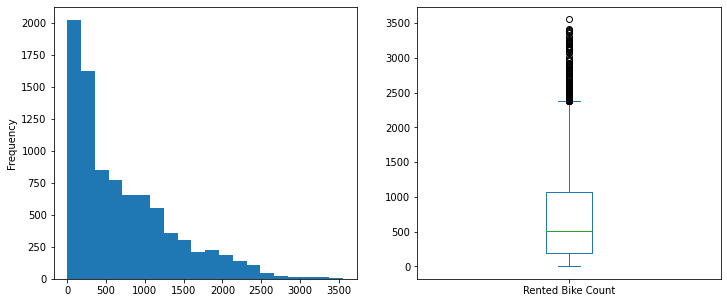

In [21]:
#distribution of target variable
fig = plt.figure(figsize=(25, 5))

df1 = data['Rented Bike Count']

ax1 = fig.add_subplot(141)
df1.plot.hist(ax=ax1, bins=20)

df2 = data['Rented Bike Count']

ax2 = fig.add_subplot(142)
df2.plot.box(ax=ax2)

In [22]:
numerical_features = [ ('Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)'),('Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)')]


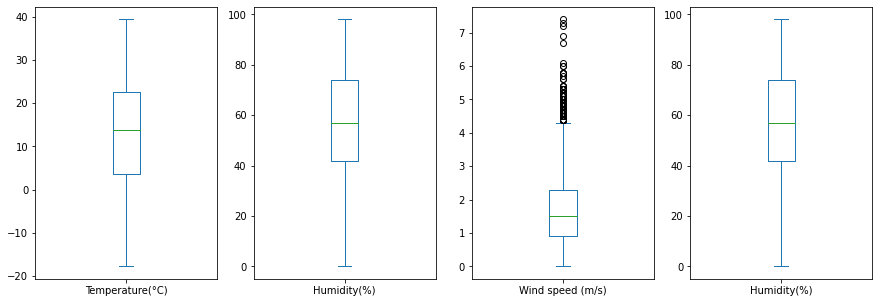

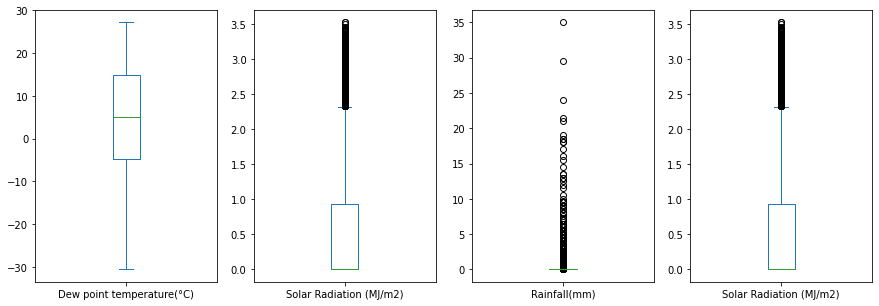

In [23]:

for i,j,k,l in numerical_features:
  fig = plt.figure(figsize=(15, 5))

  df1 = data[i]

  ax1 = fig.add_subplot(141)
  df1.plot.box(ax=ax1)

  df2 = data[j]

  ax2 = fig.add_subplot(142)
  df2.plot.box(ax=ax2)

  df3 = data[k]

  ax3 = fig.add_subplot(143)
  df3.plot.box(ax=ax3)

  df4 = data[l]

  ax4 = fig.add_subplot(144)
  df2.plot.box(ax=ax4)

  plt.show()


In [24]:
numerical_features =  [ 'Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']


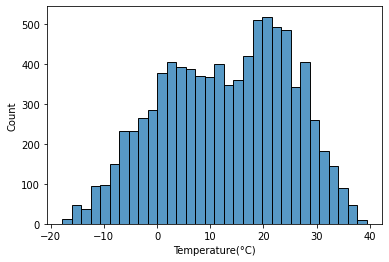

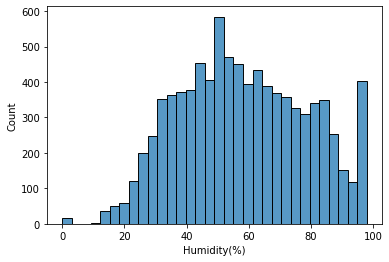

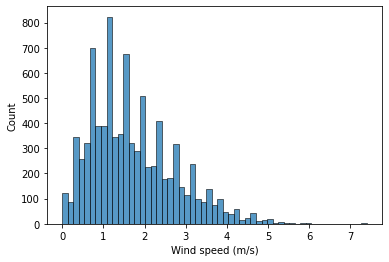

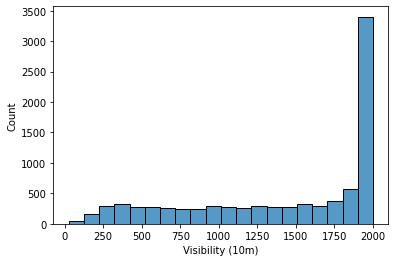

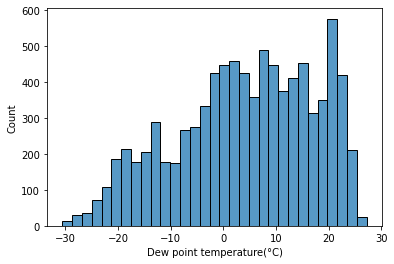

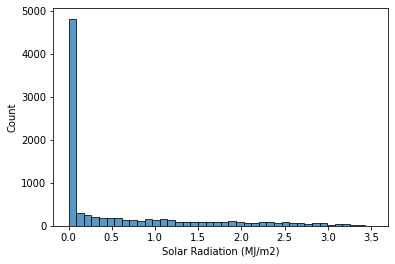

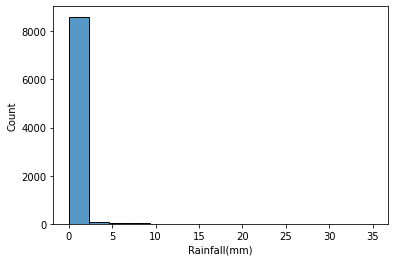

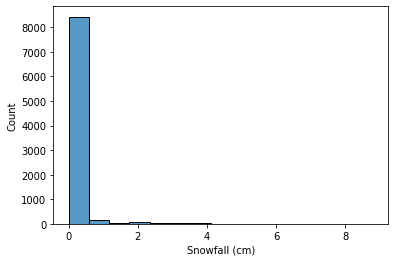

In [25]:
for i in numerical_features:
  sns.histplot(x=data[i])
  plt.show()

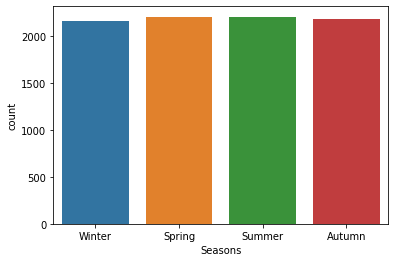

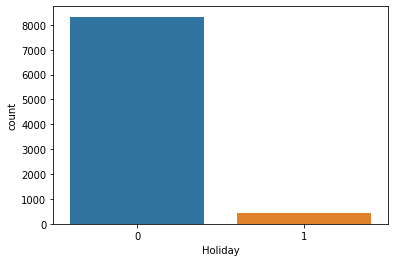

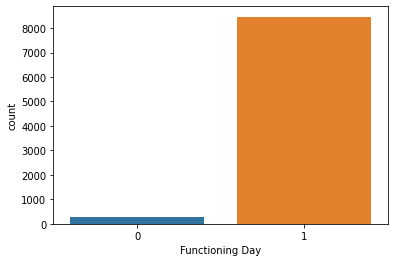

In [26]:
categorical=['Seasons','Holiday', 'Functioning Day']
for i in categorical:
  sns.countplot(data=data, x=i)
  plt.show()

###***Bivariate Analysis***

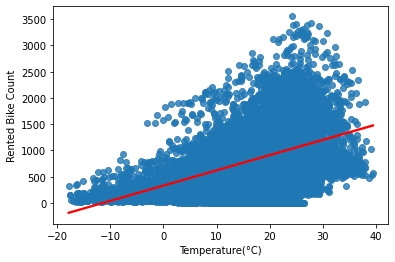

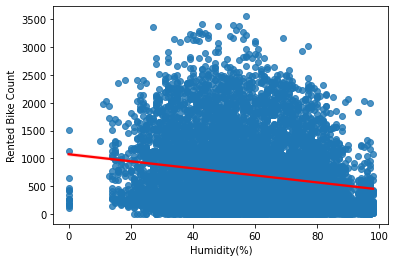

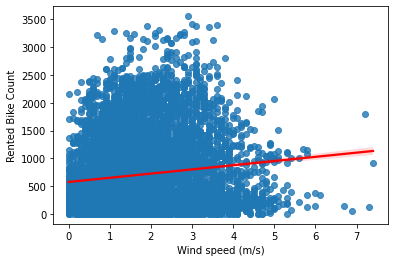

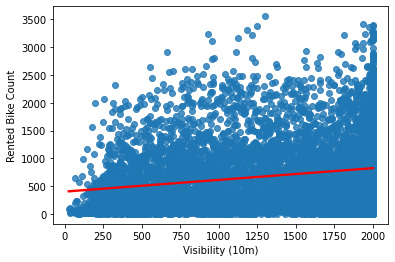

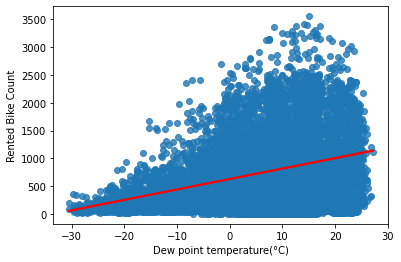

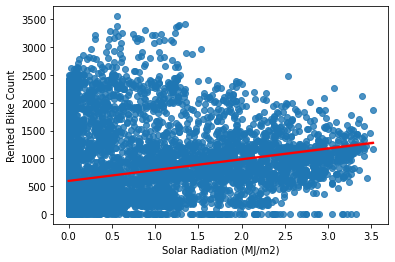

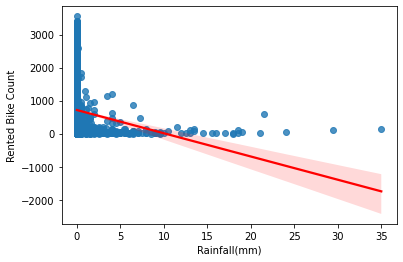

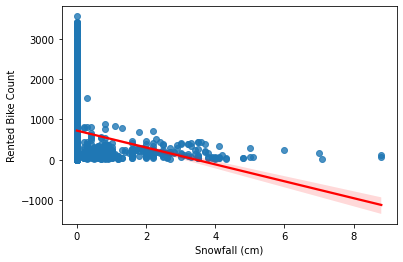

In [27]:
#Understanding relationship of variables with target variable
for i in numerical_features:
  sns.regplot(data, x=i, y='Rented Bike Count',line_kws={"color": "red"})
  plt.show()

<Axes: xlabel='weekday', ylabel='Rented Bike Count'>

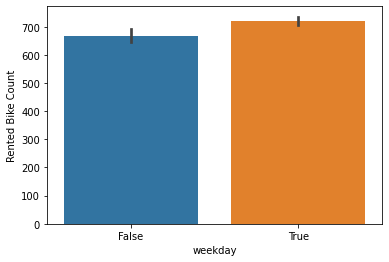

In [28]:
# distribution of bike rentals for weekdays and weekends
sns.barplot(x='weekday', y='Rented Bike Count', data=data)

In [29]:
holiday_rent = pd.DataFrame(data.groupby('Holiday').agg({'Rented Bike Count':'mean'})).reset_index()
season_rent = pd.DataFrame(data.groupby('Seasons').agg({'Rented Bike Count':'mean'})).reset_index()

Text(0.5, 1.0, 'Holiday vs Mean Rented Bike count')

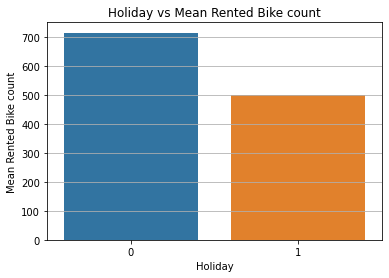

In [30]:
plt.grid()
sns.barplot(holiday_rent, x='Holiday',y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Holiday vs Mean Rented Bike count')


Text(0.5, 1.0, 'Season vs Mean Rented Bike count')

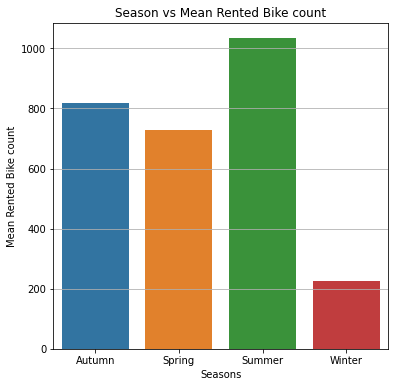

In [31]:
plt.figure(figsize=(6,6))
plt.grid()
sns.barplot(season_rent,  x='Seasons', y='Rented Bike Count')
plt.ylabel("Mean Rented Bike count")
plt.title('Season vs Mean Rented Bike count')

In [32]:
daywise_rent = data.groupby(by='day_of_week').agg({'Rented Bike Count':'mean'}).reset_index()


Text(0.5, 1.0, 'Day vs Mean Rented Bike count')

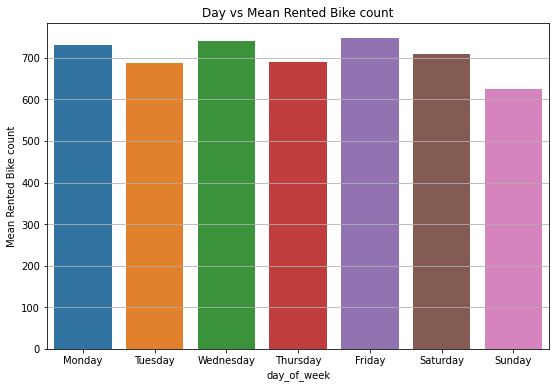

In [33]:
order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(9,6))
plt.grid()
sns.barplot(daywise_rent, x='day_of_week', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Day vs Mean Rented Bike count')

In [34]:
monthwise_rent = data.groupby(by='month').agg({'Rented Bike Count':'sum'}).reset_index()
monthwise_rent

,month,Rented Bike Count
0,April,524227
1,August,651887
2,December,185330
3,February,151833
4,January,150006
5,July,734460
6,June,896887
7,March,380594
8,May,707088
9,November,465715


Text(0.5, 1.0, 'Month vs Mean Rented Bike count')

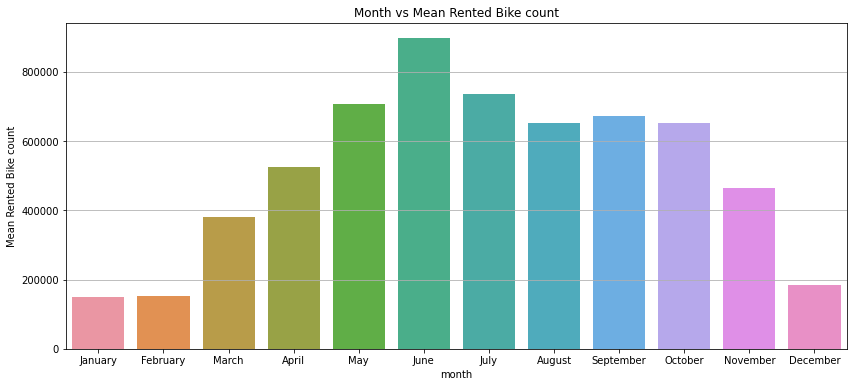

In [35]:
order = ['January','February','March', 'April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,6))
plt.grid()
sns.barplot(monthwise_rent, x='month', y='Rented Bike Count', order=order)
plt.ylabel("Mean Rented Bike count")
plt.title('Month vs Mean Rented Bike count')

In [36]:
hourwise_rent = data.groupby(by='Hour').agg({'Rented Bike Count':'mean'}).reset_index()

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count')

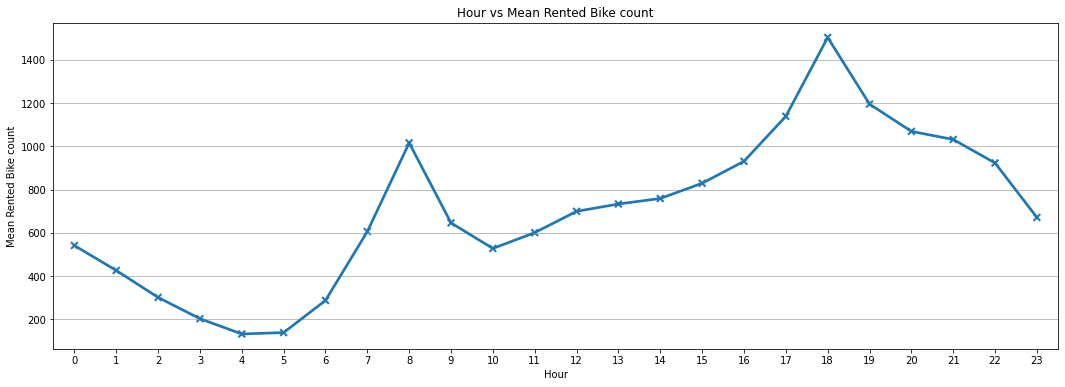

In [37]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(hourwise_rent, x='Hour', y='Rented Bike Count', markers='x')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count')

Text(0.5, 1.0, 'Hour vs Rented Bike count')

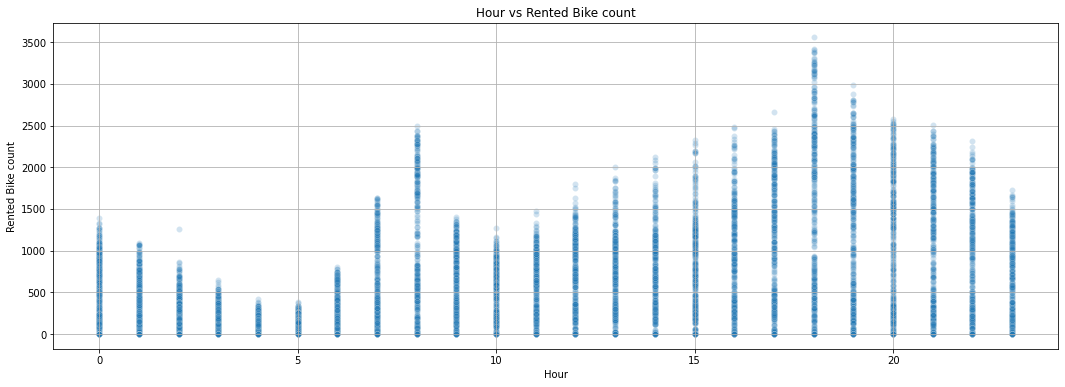

In [38]:
plt.figure(figsize=(18,6))
plt.grid()
sns.scatterplot(data, x='Hour', y='Rented Bike Count', alpha=0.2)
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count')

Text(0, 0.5, 'Rented Bikes')

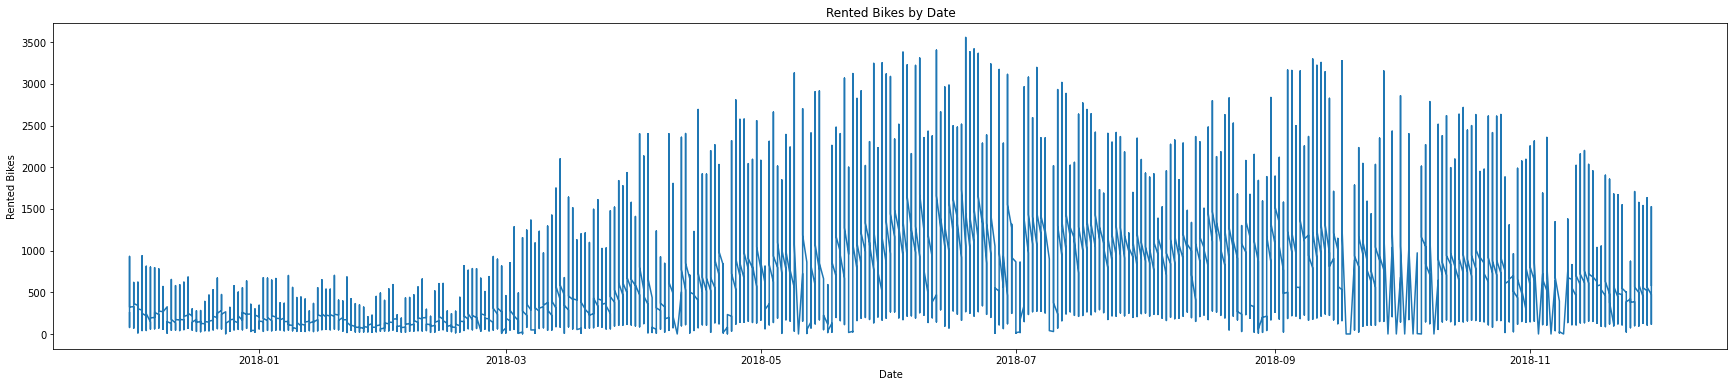

In [39]:
# Plotting the time series of given dataframe
plt.figure(figsize=(30,6))
plt.plot(data['Date'], data['Rented Bike Count'])
 
# Giving title to the chart using plt.title
plt.title('Rented Bikes by Date')
 
# rotating the x-axis tick labels at 30degree
# towards right
# plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Rented Bikes')

### ***Multivariate Analysis***

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs days')

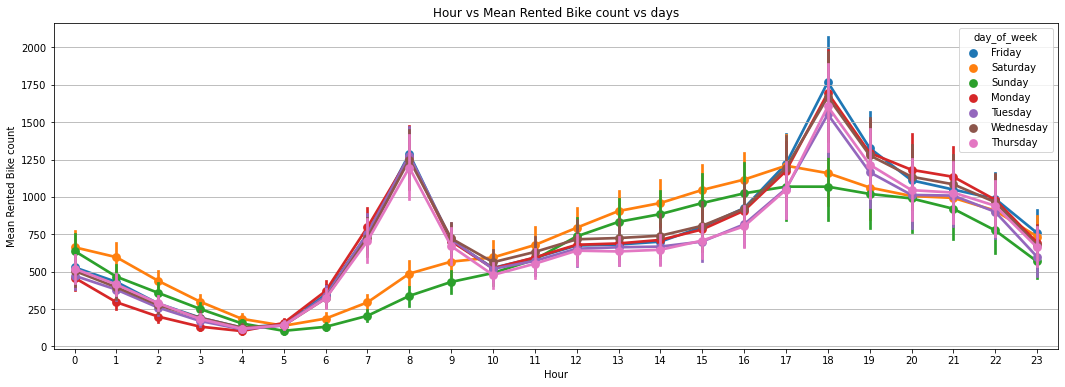

In [40]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='o', hue='day_of_week')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs days')

Text(0.5, 1.0, 'Hour vs Mean Rented Bike count vs Seasons')

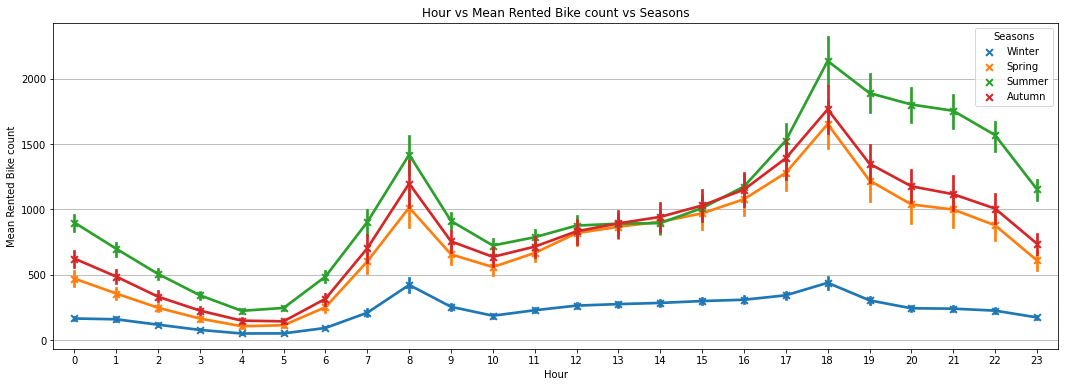

In [41]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(data, x='Hour', y='Rented Bike Count', markers='x', hue='Seasons')
plt.ylabel("Mean Rented Bike count")
plt.title('Hour vs Mean Rented Bike count vs Seasons')

<Axes: >

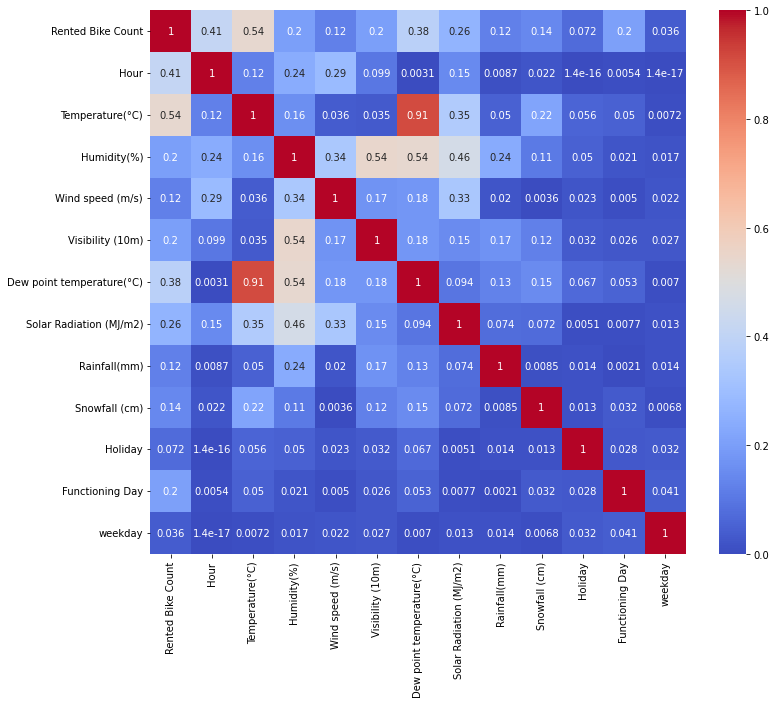

In [42]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(data.corr().abs(), annot=True,cmap='coolwarm')

## ***Hypothesis Testing***

### **Hypothetical Statement - 1**
### The average number of bike rentals is different on weekends than on weekdays.

**Null Hypothesis** --> Average bike rentals is same on Weekend as well as Weekdays.

**Alternative Hypothesis** --> Average bike rentals is different on Weekend and Weekdays.

In [43]:
#split the data into two groups: one for weekdays and one for weekends
weekday_rentals = data.loc[data['weekday'], 'Rented Bike Count']
weekend_rentals = data.loc[~data['weekday'], 'Rented Bike Count']

In [44]:
#perform a two-sample t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(weekday_rentals, weekend_rentals)
print('t-statistic:', t_stat)
print('p-value:', p_val)


t-statistic: 3.4150448192415523
p-value: 0.0006406092926737229


In [45]:
# Determine if the p-value is significant at the 5% level
if p_val < 0.05:
    print('Reject the null hypothesis:')
    print('The mean number of bike rentals is significantly different on weekends compared to weekdays.')
else:
    print('Fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that the mean number of bike rentals is significantly different on weekends compared to weekdays.')

Reject the null hypothesis:
The mean number of bike rentals is significantly different on weekends compared to weekdays.


### **Hypothetical Statement-2**

### There is a significant difference in the average number of bike rentals during different seasons.

**Null Hypothesis** --> Average number of bike rentals is same during different seasons.

**Alternative Hypothesis** --> Average number of bike rentals is different during different seasons.

In [46]:
# Separate the data into four groups (one for each season)
spring_rentals = data.loc[data['Seasons'] == 'Spring', 'Rented Bike Count']
summer_rentals = data.loc[data['Seasons'] == 'Summer', 'Rented Bike Count']
fall_rentals = data.loc[data['Seasons'] == 'Autumn', 'Rented Bike Count']
winter_rentals = data.loc[data['Seasons'] == 'Winter', 'Rented Bike Count']

In [47]:
# Perform an ANOVA test
f_statistic, p_value = stats.f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

In [48]:
# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 776.4678149879506
p-value: 0.0


In [49]:
# Determine if the p-value is significant at the 5% level
if p_value < 0.05:
    print('We reject the null hypothesis:')
    print('There is a significant difference in the average number of bike rentals during different seasons.')
else:
    print('We fail to reject the null hypothesis:')
    print('There is not enough evidence to conclude that there is a significant difference in the average number of bike rentals during different seasons.')

We reject the null hypothesis:
There is a significant difference in the average number of bike rentals during different seasons.


## ***Feature Engineering & Data Pre-processing***

### Handling Missing Values

There were no missing values in the given dataset.

### Handling Outliers

There were no exceptional outliers present in the dataset. Removing the current outliers would result in loss of very important data.

### Feature Manipulation and Selection

In [50]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True


In [51]:
df=data.copy()

In [52]:
model_df = df.drop(columns=['Date','Dew point temperature(°C)','weekday','year'])

In [53]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Friday,December,2017,True


In [54]:

#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [55]:
calc_vif(model_df[[i for i in model_df.describe().columns if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,4.123293
1,Temperature(°C),3.371268
2,Humidity(%),11.141082
3,Wind speed (m/s),4.681143
4,Visibility (10m),6.534147
5,Solar Radiation (MJ/m2),2.428143
6,Rainfall(mm),1.082300
7,Snowfall (cm),1.121115
8,Holiday,1.055271
9,Functioning Day,18.709066


In [56]:
model_df = model_df.drop(columns=['Functioning Day'])

In [57]:
calc_vif(model_df[[i for i in model_df.describe().columns ]])

,variables,VIF
0,Rented Bike Count,4.098338
1,Hour,4.673208
2,Temperature(°C),4.462164
3,Humidity(%),5.069445
4,Wind speed (m/s),4.618087
5,Visibility (10m),4.871197
6,Solar Radiation (MJ/m2),2.255484
7,Rainfall(mm),1.103614
8,Snowfall (cm),1.121181
9,Holiday,1.060131


### **Data Transformation**

In [58]:
model_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'day_of_week',
       'month'],
      dtype='object')

In [59]:
model_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,day_of_week,month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,Friday,December
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,Friday,December
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,Friday,December
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,Friday,December
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,Friday,December


In [60]:
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)','Rented Bike Count']

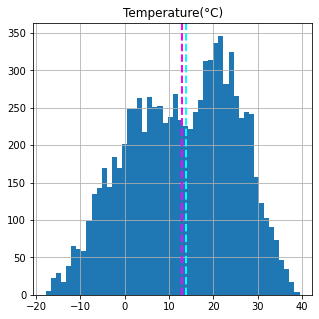

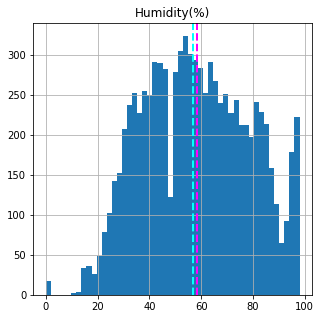

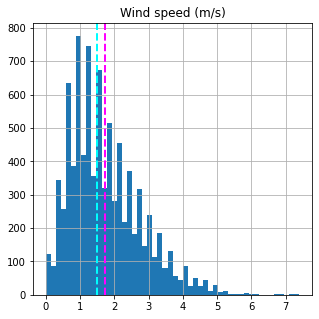

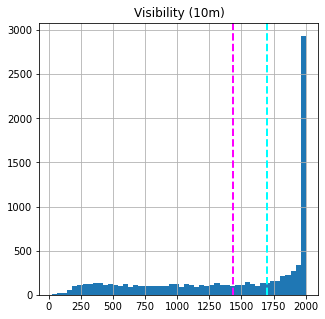

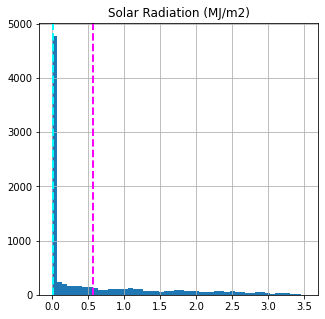

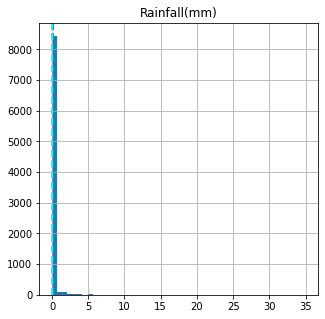

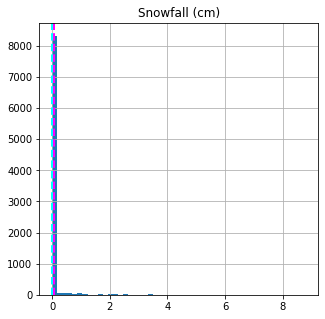

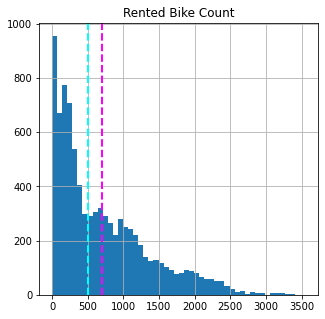

In [61]:
# distribution plot for each numerical feature count 

for col in numeric_features:
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    feature = model_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [62]:
model_df = pd.get_dummies(model_df, columns=['month','day_of_week','Hour','Seasons'], prefix=[None,None,'hour',None])

In [63]:
model_df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hour_0', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'Autumn', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

### **Data Splitting**

In [64]:
independent_variables = [i for i in model_df.columns if i not in ['Rented Bike Count']]
print(independent_variables)
dependent_variable = 'Rented Bike Count'

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Autumn', 'Spring', 'Summer', 'Winter']


In [65]:
# Create the data of independent variables
X = model_df[independent_variables].values

# Create the dependent variable data
y = model_df[dependent_variable].values

In [66]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

###**Data Scaling**

In [67]:
# Scaling data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ***ML Model Implementation***

### **Linear Regression**

In [68]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [69]:
y_pred_train = regressor.predict(X_train)

In [70]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [71]:
#Predicted trip_duration on the test data
y_pred

array([ 703.75,  746.75, 1975.75, ...,  730.75,  485.75,  867.  ])

In [72]:
# Actual trip_duration on test data
y_test

array([   0,  233, 1929, ...,  936,  572, 1353])

In [73]:
mean_squared_error(y_test, y_pred)

145151.589255137

In [74]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

391.4264723252821

In [75]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

380.9876497409555

In [76]:
r2_score(y_train, y_pred_train)

0.6282998065234804

In [77]:
r2_score(y_test, y_pred)

0.6631842368349559

### **Lasso Regression**

In [78]:
# importing lasso regressor
from sklearn.linear_model import Lasso
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-8,1e-4,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 0.0001, 0.01, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [79]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -155778.9989633434


In [80]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [81]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 145138.7590819622
RMSE : 380.97081132543764
R2 : 0.6632140085005063
Adjusted R2 :  0.6522922929742845


### **Decision Tree Regressor**

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt_regression = DecisionTreeRegressor(splitter='best', min_samples_leaf=10)
dt_regression = dt_regression.fit(X_train, y_train)


In [83]:
y_pred_train = dt_regression.predict(X_train)

In [84]:
y_pred = dt_regression.predict(X_test)

In [85]:
mean_squared_error(y_test, y_pred)

115933.93921405355

In [86]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

265.534606101915

In [87]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

340.49073293417774

In [88]:
r2_score(y_train, y_pred_train)

0.8289454394450297

In [89]:
r2_score(y_test, y_pred)

0.7309820828453015

In [90]:
y_pred

array([ 415.2       ,  192.25      , 1821.73333333, ..., 1033.61111111,
        475.1       ,  490.84615385])

In [91]:

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [92]:
predictions

,Actual,Predicted
0,0,415.200000
1,233,192.250000
2,1929,1821.733333
3,1179,1033.611111
4,556,65.000000
...,...,...
1747,40,139.400000
1748,0,277.142857
1749,936,1033.611111
1750,572,475.100000


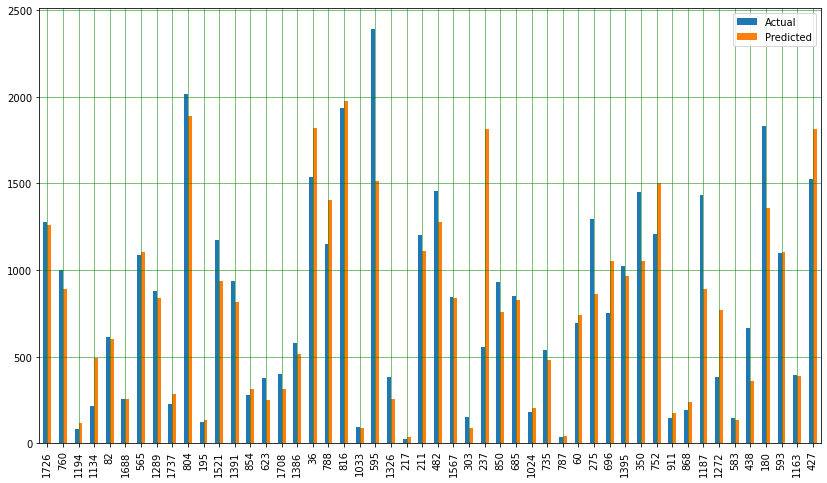

In [93]:
predictions.sample(50).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### **Random Forest**

In [94]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [95]:
ensemble_regressior.fit(X_train,y_train)

RandomForestRegressor()

In [96]:
y_pred=ensemble_regressior.predict(X_test)

In [97]:
r2_score(y_test, y_pred)

0.8273579488178878

In [98]:
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8217592973939396


In [99]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 74400.52052751141
RMSE : 272.76458811127117


In [100]:

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


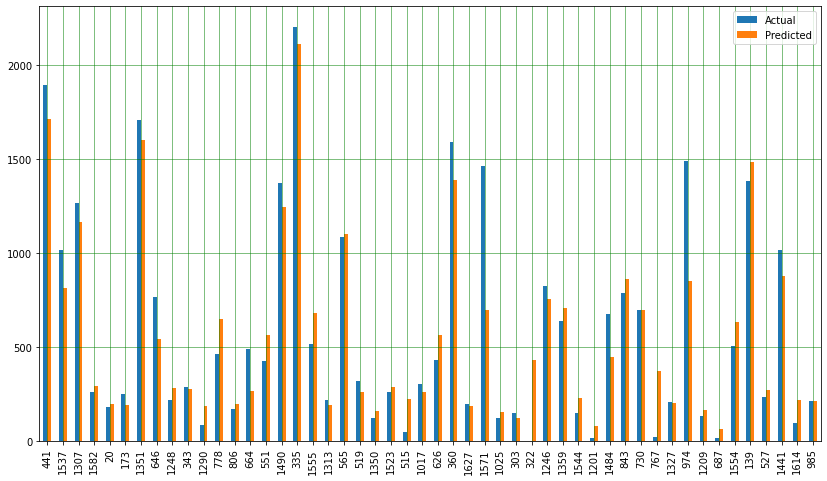

In [101]:
predictions.sample(50).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### **XGBoost**

In [102]:
import xgboost as xgb

dreg= xgb.XGBRegressor(booster= 'gbtree', max_leaves=5)
dreg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [103]:
y_pred = dreg.predict(X_test)

In [104]:
#Find R-squared value
r2 = r2_score(y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [105]:
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)

In [106]:
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

Train score: 0.9674385463508806
Test score: 0.8570152428677272


0.8570152428677272

In [107]:

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


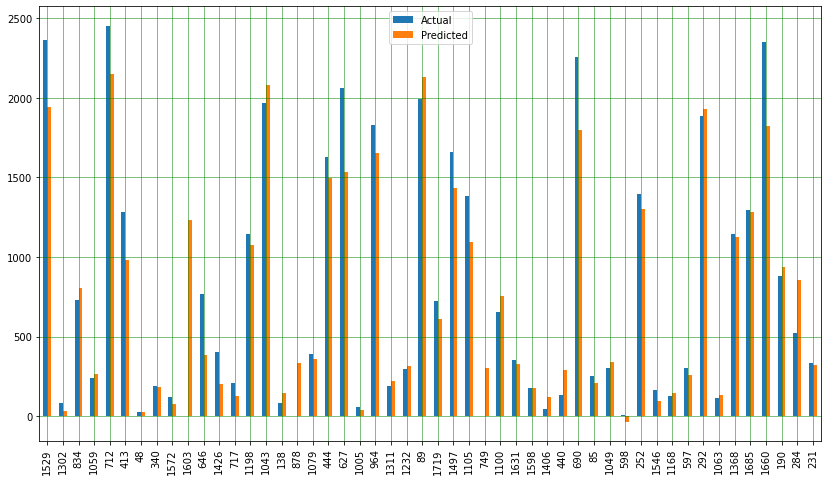

In [108]:
predictions.sample(50).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### **GridSearchCV on XGBoost**

In [109]:
params = {"min_child_weight":[8,10,12], 
            'eta': [0.04,0.08], 
            'max_depth': [13,15],
            'importance_type': ['gain'],
            'max_leaves': [2]}

In [110]:
xgbr = xgb.XGBRegressor(booster= 'gbtree')

In [ ]:

reg_gs = GridSearchCV(xgbr,scoring='neg_mean_squared_error',param_grid=params, verbose=1,cv=5)
reg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
reg_gs.best_estimator_.get_params()

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

In [ ]:
#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

In [ ]:
adj_r2

In [ ]:
SE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
# MAE  = mean_absolute_error(y_test, y_pred)
# print("MAE :" , MAE)

In [ ]:

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [ ]:
predictions.sample(50).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()